Data & Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset of this study is found in the following link:
https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv

cette Data contient plusieurs fichier csv

Lister les fichiers disponibles :

In [2]:
# importation des librairie
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Lister les fichiers disponibles :
files = glob.glob("/content/drive/MyDrive/dataset_ssh/*.csv")  # le chemin VERS LES FICHIERS CSV
print(f"Nombre de fichiers CSV trouvés: {len(files)}\n")

for f in files:
    print(f"{os.path.basename(f)} -> {os.path.getsize(f)/1024:.1f} KB")

Nombre de fichiers CSV trouvés: 10

02-14-2018.csv -> 349827.5 KB
02-15-2018.csv -> 367134.7 KB
02-16-2018.csv -> 325902.0 KB
02-20-2018.csv -> 3959888.0 KB
02-21-2018.csv -> 321185.2 KB
02-22-2018.csv -> 373668.2 KB
02-23-2018.csv -> 373867.6 KB
02-28-2018.csv -> 204345.5 KB
03-01-2018.csv -> 105315.3 KB
03-02-2018.csv -> 344109.7 KB


In [4]:
# Charger un échantillon de chaque fichier
for f in files:
    print(f"\n===== {os.path.basename(f)} =====")
    df = pd.read_csv(f, nrows=5)  # lire juste 5 lignes
    print("Colonnes :", list(df.columns))
    print(df.head())


===== 02-14-2018.csv =====
Colonnes : ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd P

In [5]:
df = pd.read_csv(files[0], low_memory=False)
print("\nTypes de colonnes :")
print(df.dtypes)

print("\nValeurs manquantes (%):")
print(df.isna().mean().round(2)*100)

print("\nAperçu des valeurs uniques (si peu nombreuses):")
for col in df.columns:
    if df[col].nunique() < 20:
        print(f"\n{col}: {df[col].unique()}")



Types de colonnes :
Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object

Valeurs manquantes (%):
Dst Port         0.0
Protocol         0.0
Timestamp        0.0
Flow Duration    0.0
Tot Fwd Pkts     0.0
                ... 
Idle Mean        0.0
Idle Std         0.0
Idle Max         0.0
Idle Min         0.0
Label            0.0
Length: 80, dtype: float64

Aperçu des valeurs uniques (si peu nombreuses):

Protocol: [ 0  6 17]

Fwd PSH Flags: [0 1]

Bwd PSH Flags: [0]

Fwd URG Flags: [0]

Bwd URG Flags: [0]

FIN Flag Cnt: [0 1]

SYN Flag Cnt: [0 1]

RST Flag Cnt: [0 1]

PSH Flag Cnt: [0 1]

ACK Flag Cnt: [0 1]

URG Flag Cnt: [0 1]

CWE Flag Count: [0]

ECE Flag Cnt: [0 1]

Fwd Byts/b Avg: [0]

Fwd Pkts/b Avg: [0]

Fwd Blk Rate Avg: [0]

Bwd Byts

In [6]:
len(files)

10

In [7]:
df = files[0]

In [8]:
import pandas as pd


for f in files:
    print(f"\n===== {os.path.basename(f)} =====")
    df = pd.read_csv(f, low_memory=False)
    print("Labels :", df['Label'].unique())



===== 02-14-2018.csv =====
Labels : ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']

===== 02-15-2018.csv =====


KeyboardInterrupt: 

In [10]:



print("\n===== Fichier chargé : 02-14-2018.csv =====")
print(df.shape)
print(df['Label'].value_counts())

df.head()


===== Fichier chargé : 02-14-2018.csv =====
(1048575, 80)
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


le fichier 02-14-2018.csv est contient en label ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']
alors en travail sur Ce fichier

In [12]:
print(df.shape)
print(df['Label'].value_counts())
df.head()

(1048575, 80)
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


/tmp/ipython-input-1663691488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


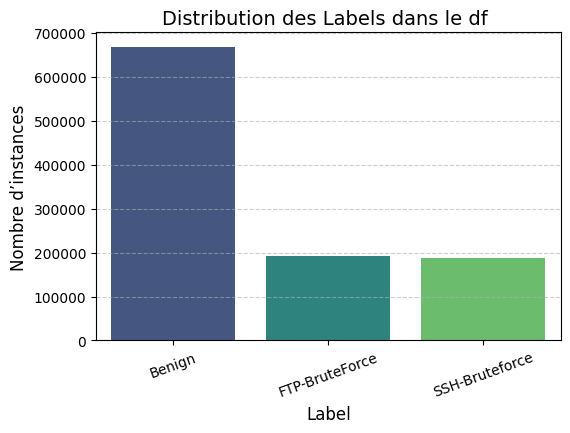

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Label', palette='viridis')

plt.title('Distribution des Labels dans le df ', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Nombre d’instances', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Filtrer les labels pertinents pour seulement ['Benign', 'SSH-Bruteforce']

In [14]:
df = df[df['Label'].isin(['Benign', 'SSH-Bruteforce'])]

reafficher le nombre total d’instances et la répartition des labels

In [15]:
print(df.shape)
print(df['Label'].value_counts())

(855215, 80)
Label
Benign            667626
SSH-Bruteforce    187589
Name: count, dtype: int64


/tmp/ipython-input-3437077457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


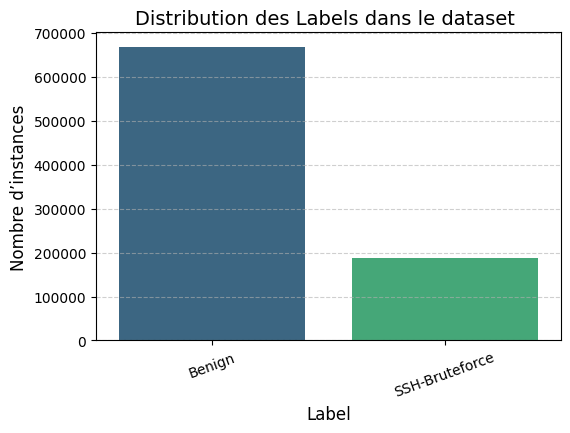

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Label', palette='viridis')

plt.title('Distribution des Labels dans le dataset ', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Nombre d’instances', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


les pourcentages

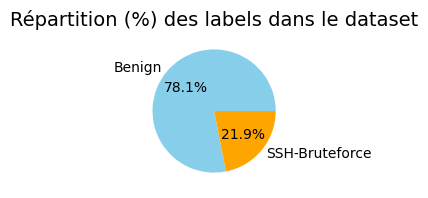

In [17]:
label_counts = df['Label'].value_counts(normalize=True) * 100
label_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4,2), colors=['skyblue','orange','red'])
plt.title("Répartition (%) des labels dans le dataset", fontsize=14)
plt.ylabel('')
plt.show()


In [18]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [19]:
print(f"The dataset is made up of {len(df)} instances")

The dataset is made up of 855215 instances


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855215 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           855215 non-null  int64  
 1   Protocol           855215 non-null  int64  
 2   Timestamp          855215 non-null  object 
 3   Flow Duration      855215 non-null  int64  
 4   Tot Fwd Pkts       855215 non-null  int64  
 5   Tot Bwd Pkts       855215 non-null  int64  
 6   TotLen Fwd Pkts    855215 non-null  int64  
 7   TotLen Bwd Pkts    855215 non-null  int64  
 8   Fwd Pkt Len Max    855215 non-null  int64  
 9   Fwd Pkt Len Min    855215 non-null  int64  
 10  Fwd Pkt Len Mean   855215 non-null  float64
 11  Fwd Pkt Len Std    855215 non-null  float64
 12  Bwd Pkt Len Max    855215 non-null  int64  
 13  Bwd Pkt Len Min    855215 non-null  int64  
 14  Bwd Pkt Len Mean   855215 non-null  float64
 15  Bwd Pkt Len Std    855215 non-null  float64
 16  Flow B

Supprimer les colonnes inutiles

In [21]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

Drop the 'Timestamp' and 'Dst Port' columns, because it doesn't bring any relavant clues to find the class label

In [22]:
df = df.drop(columns=["Timestamp"])

In [23]:
df=df.drop(columns=["Protocol"])

Data Cleaning


Vérifier et gérer les valeurs manquantes

In [24]:
df.isnull().sum()

,0
Dst Port,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [25]:
print(df.isnull().sum().sum())  # nombre total de valeurs manquantes

2271


Null values present only in the 'Flow Byts/s' column

In [26]:
df.columns.to_series()[df.isna().any()]


,0
Flow Byts/s,Flow Byts/s


Supprime toutes les lignes qui contiennent au moins une valeur manquante

In [27]:
df = df.dropna()

In [28]:
print(df.isnull().sum().sum())  # nombre total de valeurs manquantes

0


Vérifier et corriger les valeurs aberrantes

garder des données réalistes.

In [29]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()


Dropping duplicates

In [30]:
print(f"Number of duplicates is: {df.duplicated().sum().sum()}")

Number of duplicates is: 180312


In [31]:
df = df.drop_duplicates()

Our dataset dropped from 855215 to 671085 rows after data cleaning

In [32]:
print(df.shape)
print(df['Label'].value_counts())

(671085, 78)
Label
Benign            577037
SSH-Bruteforce     94048
Name: count, dtype: int64


Encodage du label (target encoding)

transformer les labels en format numérique pour le modèle ML.

In [33]:
df['Label'] = df['Label'].map({'Benign': 0, 'SSH-Bruteforce': 1})


Encodage des variables catégorielles

# Rééquilibrage des classes

Sous-échantillonnage de la classe majoritaire (Under-sampling

On réduit le nombre de lignes de la classe majoritaire (Benign) pour qu’elle soit proche de la classe minoritaire (SSH-Bruteforce).

In [34]:
from sklearn.utils import resample

# Séparer les classes

df_majority = df[df.Label == 0]  # Benign
df_minority = df[df.Label == 1]  # SSH-Bruteforce

# Rééchantillonner la classe majoritaire pour qu’elle ait le même nombre que la minoritaire
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # ne pas réutiliser les lignes
                                   n_samples=len(df_minority),
                                   random_state=42)

# Recombiner
df_balanced = pd.concat([df_majority_downsampled, df_minority])


In [35]:
df_balanced

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
578457,443,3355421,9,20,1349,6039,485,0,149.888889,206.210720,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
925540,80,117554237,19,18,1313,2118,434,0,69.105263,162.334324,...,20,279595.363636,610492.012691,2120298,95438,1.000939e+07,14072.215929,10013732,9966960,0
457065,51021,29942361,2,0,0,0,0,0,0.000000,0.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
667064,49946,19,1,1,0,0,0,0,0.000000,0.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
994453,53,1156,1,1,49,77,49,49,49.000000,0.000000,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376214,22,258,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
379530,22,73,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
380529,22,68,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
381518,21,47,1,1,0,0,0,0,0.000000,0.000000,...,40,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1


#  Feature Engineering


In [36]:
# Clean the Label column
df = df.dropna(subset=['Label'])
print("After removing NaN in Label:", df.shape)

After removing NaN in Label: (671085, 78)


Features BEFORE Feature Engineering

In [37]:
print("\n Features BEFORE Feature Engineering")
original_features = df.drop("Label", axis=1).columns
print("Number of features BEFORE:", len(original_features))


 Features BEFORE Feature Engineering
Number of features BEFORE: 77


In [38]:
print("List of features BEFORE:")
for f in original_features:
    print(" -", f)

List of features BEFORE:
 - Dst Port
 - Flow Duration
 - Tot Fwd Pkts
 - Tot Bwd Pkts
 - TotLen Fwd Pkts
 - TotLen Bwd Pkts
 - Fwd Pkt Len Max
 - Fwd Pkt Len Min
 - Fwd Pkt Len Mean
 - Fwd Pkt Len Std
 - Bwd Pkt Len Max
 - Bwd Pkt Len Min
 - Bwd Pkt Len Mean
 - Bwd Pkt Len Std
 - Flow Byts/s
 - Flow Pkts/s
 - Flow IAT Mean
 - Flow IAT Std
 - Flow IAT Max
 - Flow IAT Min
 - Fwd IAT Tot
 - Fwd IAT Mean
 - Fwd IAT Std
 - Fwd IAT Max
 - Fwd IAT Min
 - Bwd IAT Tot
 - Bwd IAT Mean
 - Bwd IAT Std
 - Bwd IAT Max
 - Bwd IAT Min
 - Fwd PSH Flags
 - Bwd PSH Flags
 - Fwd URG Flags
 - Bwd URG Flags
 - Fwd Header Len
 - Bwd Header Len
 - Fwd Pkts/s
 - Bwd Pkts/s
 - Pkt Len Min
 - Pkt Len Max
 - Pkt Len Mean
 - Pkt Len Std
 - Pkt Len Var
 - FIN Flag Cnt
 - SYN Flag Cnt
 - RST Flag Cnt
 - PSH Flag Cnt
 - ACK Flag Cnt
 - URG Flag Cnt
 - CWE Flag Count
 - ECE Flag Cnt
 - Down/Up Ratio
 - Pkt Size Avg
 - Fwd Seg Size Avg
 - Bwd Seg Size Avg
 - Fwd Byts/b Avg
 - Fwd Pkts/b Avg
 - Fwd Blk Rate Avg
 - Bwd B

Feature engineering is the process of creating, transforming, or selecting features from raw data to make it more informative and improve the performance of machine learning models.


We create new features to better capture patterns in the data.
1. Fwd_Bwd_Pkt_Ratio → ratio of forward vs backward packets, may detect suspicious flows.
2. Fwd_Pkt_Avg_Size, Bwd_Pkt_Avg_Size → average packet size, abnormal sizes may indicate attacks.
3. Fwd_Pkt_Size_Range, Bwd_Pkt_Size_Range → range of packet lengths, highlights variability.
4. Total_Flags → total number of flags, can show attack patterns.
5. Flow_Duration_Per_Pkt → duration per packet, helps detect abnormal flow speeds.
6. Large_Fwd_Pkt, Large_Bwd_Pkt → binary feature if packet size > 1000 bytes, useful for anomalies.

In [39]:
df['Fwd_Bwd_Pkt_Ratio'] = df['Tot Fwd Pkts'] / (df['Tot Bwd Pkts'] + 1)
df['Fwd_Pkt_Avg_Size'] = df['TotLen Fwd Pkts'] / (df['Tot Fwd Pkts'] + 1)
df['Bwd_Pkt_Avg_Size'] = df['TotLen Bwd Pkts'] / (df['Tot Bwd Pkts'] + 1)
df['Fwd_Pkt_Size_Range'] = df['Fwd Pkt Len Max'] - df['Fwd Pkt Len Min']
df['Bwd_Pkt_Size_Range'] = df['Bwd Pkt Len Max'] - df['Bwd Pkt Len Min']
df['Total_Flags'] = df['PSH Flag Cnt'] + df['ACK Flag Cnt'] + df['SYN Flag Cnt']
df['Flow_Duration_Per_Pkt'] = df['Flow Duration'] / (df['Tot Fwd Pkts'] + df['Tot Bwd Pkts'] + 1)
df['Large_Fwd_Pkt'] = (df['Fwd Pkt Len Max'] > 1000).astype(int)
df['Large_Bwd_Pkt'] = (df['Bwd Pkt Len Max'] > 1000).astype(int)
print("Feature Engineering completed.")


Feature Engineering completed.


Features AFTER Feature Engineering

In [40]:
print("\n Features AFTER Feature Engineering")
X = df.drop("Label", axis=1)
new_features = X.columns
print("Number of features AFTER:", len(new_features))


 Features AFTER Feature Engineering
Number of features AFTER: 86


In [41]:
print("List of features AFTER:")
for f in new_features:
    print(" -", f)



List of features AFTER:
 - Dst Port
 - Flow Duration
 - Tot Fwd Pkts
 - Tot Bwd Pkts
 - TotLen Fwd Pkts
 - TotLen Bwd Pkts
 - Fwd Pkt Len Max
 - Fwd Pkt Len Min
 - Fwd Pkt Len Mean
 - Fwd Pkt Len Std
 - Bwd Pkt Len Max
 - Bwd Pkt Len Min
 - Bwd Pkt Len Mean
 - Bwd Pkt Len Std
 - Flow Byts/s
 - Flow Pkts/s
 - Flow IAT Mean
 - Flow IAT Std
 - Flow IAT Max
 - Flow IAT Min
 - Fwd IAT Tot
 - Fwd IAT Mean
 - Fwd IAT Std
 - Fwd IAT Max
 - Fwd IAT Min
 - Bwd IAT Tot
 - Bwd IAT Mean
 - Bwd IAT Std
 - Bwd IAT Max
 - Bwd IAT Min
 - Fwd PSH Flags
 - Bwd PSH Flags
 - Fwd URG Flags
 - Bwd URG Flags
 - Fwd Header Len
 - Bwd Header Len
 - Fwd Pkts/s
 - Bwd Pkts/s
 - Pkt Len Min
 - Pkt Len Max
 - Pkt Len Mean
 - Pkt Len Std
 - Pkt Len Var
 - FIN Flag Cnt
 - SYN Flag Cnt
 - RST Flag Cnt
 - PSH Flag Cnt
 - ACK Flag Cnt
 - URG Flag Cnt
 - CWE Flag Count
 - ECE Flag Cnt
 - Down/Up Ratio
 - Pkt Size Avg
 - Fwd Seg Size Avg
 - Bwd Seg Size Avg
 - Fwd Byts/b Avg
 - Fwd Pkts/b Avg
 - Fwd Blk Rate Avg
 - Bwd By

Newly Created Features

In [42]:
print("\n Newly Created Features")
added_features = list(set(new_features) - set(original_features))
print(f"Number of newly created features: {len(added_features)}")
for f in added_features:
    print(" -", f)



 Newly Created Features
Number of newly created features: 9
 - Flow_Duration_Per_Pkt
 - Bwd_Pkt_Size_Range
 - Large_Bwd_Pkt
 - Fwd_Pkt_Size_Range
 - Total_Flags
 - Bwd_Pkt_Avg_Size
 - Fwd_Bwd_Pkt_Ratio
 - Large_Fwd_Pkt
 - Fwd_Pkt_Avg_Size


Encode Text Columns

In [43]:
print("\n Encode Text Columns")
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
print("Encoding completed.")



 Encode Text Columns
Encoding completed.


In [44]:
print("\n Replace NaN and Infinity")
import numpy as np

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)



 Replace NaN and Infinity


Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Standardization completed.")


Standardization completed.


In [46]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("First 5 rows after standardization:")
print(X_scaled_df.head())

First 5 rows after standardization:
   Dst Port  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0 -0.424290       0.065313     -0.109604     -0.082205        -0.035414   
1 -0.424290       0.065313     -0.109604     -0.082205        -0.035414   
2 -0.424290       0.065311     -0.109604     -0.082205        -0.035414   
3 -0.423008      -0.002092      0.107033     -0.005841         0.027591   
4 -0.423008      -0.000600      0.088980      0.001795         0.022710   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0        -0.037286        -0.834379        -0.477476         -0.992193   
1        -0.037286        -0.834379        -0.477476         -0.992193   
2        -0.037286        -0.834379        -0.477476         -0.992193   
3        -0.025280         1.470485        -0.477476          0.438397   
4        -0.025618         1.470485        -0.477476          0.421820   

   Fwd Pkt Len Std  ...  Idle Min  Fwd_Bwd_Pkt_Ratio  Fwd_Pkt_Avg_Si

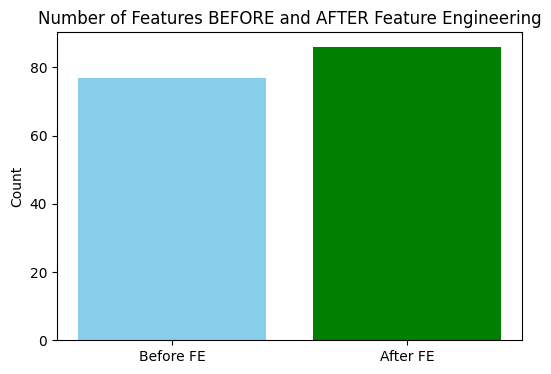

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(["Before FE", "After FE"], [len(original_features), len(new_features)], color=["skyblue", "green"])
plt.title("Number of Features BEFORE and AFTER Feature Engineering")
plt.ylabel("Count")
plt.show()



In [48]:
print(f"Total number of features before FE: {len(original_features)}")
print(f"Total number of features after FE: {len(new_features)}")
print(f"Number of newly created features: {len(added_features)}")


Total number of features before FE: 77
Total number of features after FE: 86
Number of newly created features: 9


In [49]:
print("\n Feature Importance")
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, df['Label'])

importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": new_features, "Importance": importances}).sort_values(by="Importance", ascending=False)




 Feature Importance


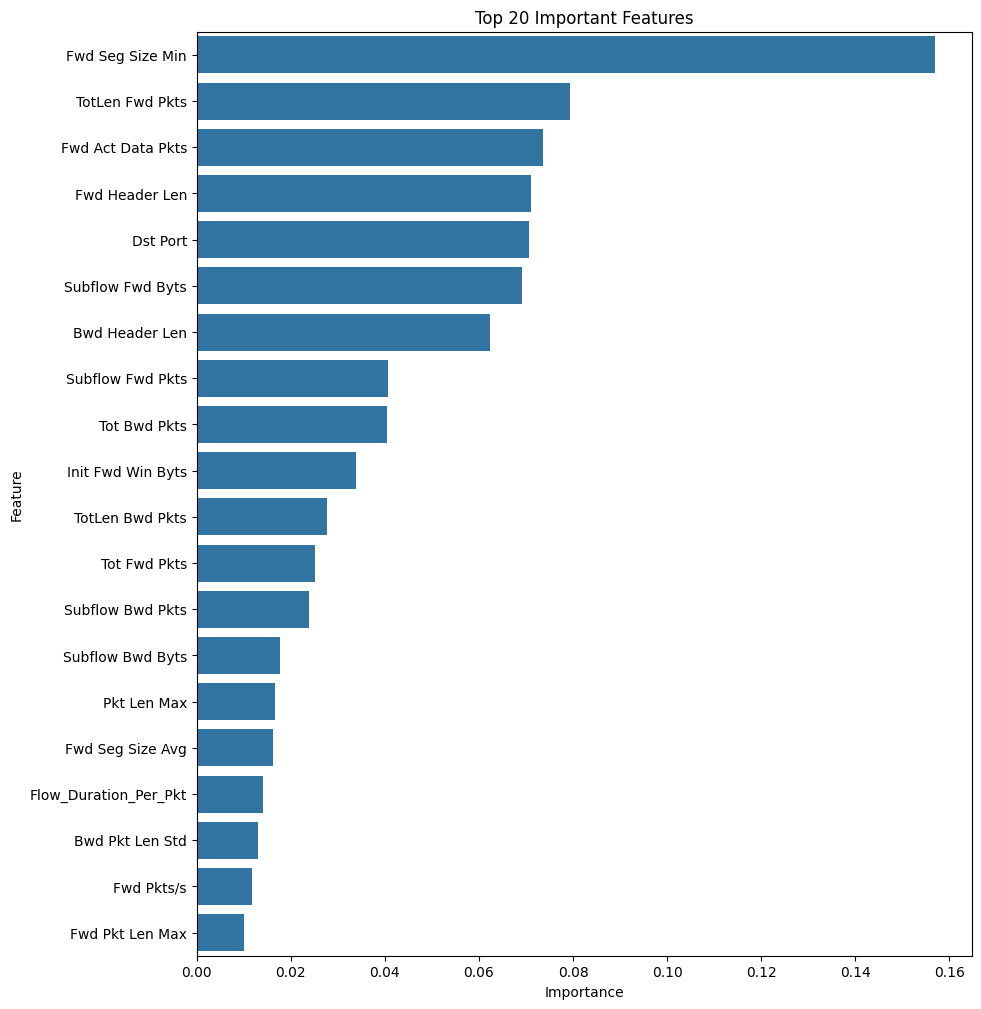

In [50]:
# Plot Top 20 features
plt.figure(figsize=(10,12))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(20))
plt.title("Top 20 Important Features")
plt.show()


In [51]:
print("\nTop 20 Important Features:")
print(feat_imp.head(20))



Top 20 Important Features:
                  Feature  Importance
68       Fwd Seg Size Min    0.156884
4         TotLen Fwd Pkts    0.079349
67      Fwd Act Data Pkts    0.073690
34         Fwd Header Len    0.071146
0                Dst Port    0.070614
62       Subflow Fwd Byts    0.069255
35         Bwd Header Len    0.062360
61       Subflow Fwd Pkts    0.040600
3            Tot Bwd Pkts    0.040545
65      Init Fwd Win Byts    0.033909
5         TotLen Bwd Pkts    0.027757
2            Tot Fwd Pkts    0.025222
63       Subflow Bwd Pkts    0.023781
64       Subflow Bwd Byts    0.017795
39            Pkt Len Max    0.016566
53       Fwd Seg Size Avg    0.016144
83  Flow_Duration_Per_Pkt    0.014080
13        Bwd Pkt Len Std    0.013046
36             Fwd Pkts/s    0.011774
6         Fwd Pkt Len Max    0.010114


In [52]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, max_features=20, threshold=-np.inf, prefit=True)
X_selected = selector.transform(X_scaled)
selected_features = X.columns[selector.get_support()]

print("\nSelected Top 20 Features:")
print(list(selected_features))


Selected Top 20 Features:
['Dst Port', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Bwd Pkt Len Std', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Pkt Len Max', 'Fwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Flow_Duration_Per_Pkt']


In [53]:
#Create Final Dataset with Top Features + Label
df_final = pd.DataFrame(X_selected, columns=selected_features)
df_final['Label'] = df['Label'].values

# Preview final dataset
print("\nFinal Dataset Sample:")
print(df_final.head())


Final Dataset Sample:
   Dst Port  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0 -0.424290     -0.109604     -0.082205        -0.035414        -0.037286   
1 -0.424290     -0.109604     -0.082205        -0.035414        -0.037286   
2 -0.424290     -0.109604     -0.082205        -0.035414        -0.037286   
3 -0.423008      0.107033     -0.005841         0.027591        -0.025280   
4 -0.423008      0.088980      0.001795         0.022710        -0.025618   

   Fwd Pkt Len Max  Bwd Pkt Len Std  Fwd Header Len  Bwd Header Len  \
0        -0.834379        -0.837763       -0.167361       -0.098632   
1        -0.834379        -0.837763       -0.167361       -0.098632   
2        -0.834379        -0.837763       -0.167361       -0.098632   
3         1.470485         0.951345        0.196071        0.026272   
4         1.470485         0.905962        0.172240        0.038458   

   Fwd Pkts/s  ...  Fwd Seg Size Avg  Subflow Fwd Pkts  Subflow Fwd Byts  \
0   -0.1215

In [54]:
# Save Final Dataset
import os

# Save path in your Drive
out_dir = "/content/drive/MyDrive/dataset_ssh/data_final"

# Create the folder if it doesn't exist
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Save the final dataset
df_final.to_csv(os.path.join(out_dir, "ssh_dataset_final.csv"), index=False)
print("\nDataset successfully saved at:", os.path.join(out_dir, "ssh_dataset_final.csv"))



Dataset successfully saved at: /content/drive/MyDrive/dataset_ssh/data_final/ssh_dataset_final.csv
